In [ ]:
import pandas as pd
import numpy as np
import nltk
import string

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_r

True

In [ ]:
data = 'imdb_labelled.txt'
data = pd.read_csv(data, delimiter='\t', header=None, names=['text','label'])

In [ ]:
### change the text column datatype to string
data = data.astype({'text':'string'})

In [ ]:
### get the review text for preprocessing
text = data['text']

## **Data Preprocessing**

In [ ]:
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Create DataFrame
df = pd.DataFrame(data)


df_preprocessed = pd.DataFrame(data)

def preprocess_text_steps(text):
    #Remove punctuation
    text_no_punct = text.translate(str.maketrans("", "", string.punctuation))

    #Remove numbers
    text_no_numbers = ''.join([char for char in text_no_punct if not char.isdigit()])

    #Lowercase
    text_lower = text_no_numbers.lower()

    #Remove stop words
    stop_words = set(stopwords.words("english"))
    text_no_stopwords = " ".join([word for word in text_lower.split() if word not in stop_words])

    #Tokenization
    tokens = word_tokenize(text_no_stopwords)

    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    #stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    return text_no_punct, text_no_numbers, text_lower, text_no_stopwords, tokens, lemmatized_tokens, stemmed_tokens

# to show each process applying to the process before
df_preprocessed['Text_No_Punctuation'] = df_preprocessed['text'].apply(lambda x: preprocess_text_steps(x)[0])
df_preprocessed['Text_No_Numbers'] = df_preprocessed['text'].apply(lambda x: preprocess_text_steps(x)[1])
df_preprocessed['Text_Lowercase'] = df_preprocessed['text'].apply(lambda x: preprocess_text_steps(x)[2])
df_preprocessed['Text_No_Stopwords'] = df_preprocessed['text'].apply(lambda x: preprocess_text_steps(x)[3])
df_preprocessed['Tokenisation'] = df_preprocessed['text'].apply(lambda x: preprocess_text_steps(x)[6])
df_preprocessed['Stemming'] = df_preprocessed['text'].apply(lambda x: preprocess_text_steps(x)[5])
df_preprocessed['Lemmatisation'] = df_preprocessed['text'].apply(lambda x: preprocess_text_steps(x)[4])

df_preprocessed

text  label  \
0    A very, very, very slow-moving, aimless movie ...      0   
1    Not sure who was more lost - the flat characte...      0   
2    Attempting artiness with black & white and cle...      0   
3         Very little music or anything to speak of.        0   
4    The best scene in the movie was when Gerardo i...      1   
..                                                 ...    ...   
743  I just got bored watching Jessice Lange take h...      0   
744  Unfortunately, any virtue in this film's produ...      0   
745                   In a word, it is embarrassing.        0   
746                               Exceptionally bad!        0   
747  All in all its an insult to one's intelligence...      0   

                                   Text_No_Punctuation  \
0    A very very very slowmoving aimless movie abou...   
1    Not sure who was more lost  the flat character...   
2    Attempting artiness with black  white and clev...   
3          Very little music or anything to speak of     
4    The best scene in the movie was when Gerardo i...   
..                                                 ...   
743  I just got bored watching Jessice Lange take h...   
744  Unfortunately any virtue in this films product...   
745                     In a word it is embarrassing     
746                                Exceptionally bad     
747  All in all its an insult to ones intelligence ...   

                                       Text_No_Numbers  \
0    A very very very slowmoving aimless movie abou...   
1    Not sure who was more lost  the flat character...   
2    Attempting artiness with black  white and clev...   
3          Very little music or anything to speak of     
4    The best scene in the movie was when Gerardo i...   
..                                                 ...   
743  I just got bored watching Jessice Lange take h...   
744  Unfortunately any virtue in this films product...   
745                     In a word it is embarrassing     
746                                Exceptionally bad     
747  All in all its an insult to ones intelligence ...   

                                        Text_Lowercase  \
0    a very very very slowmoving aimless movie abou...   
1    not sure who was more lost  the flat character...   
2    attempting artiness with black  white and clev...   
3          very little music or anything to speak of     
4    the best scene in the movie was when gerardo i...   
..                                                 ...   
743  i just got bored watching jessice lange take h...   
744  unfortunately any virtue in this films product...   
745                     in a word it is embarrassing     
746                                exceptionally bad     
747  all in all its an insult to ones intelligence ...   

                                     Text_No_Stopwords  \
0    slowmoving aimless movie distressed drifting y...   
1    sure lost flat characters audience nearly half...   
2    attempting artiness black white clever camera ...   
3                          little music anything speak   
4    best scene movie gerardo trying find song keep...   
..                                                 ...   
743      got bored watching jessice lange take clothes   
744  unfortunately virtue films production work los...   
745                                  word embarrassing   
746                                  exceptionally bad   
747          insult ones intelligence huge waste money   

                                          Tokenisation  \
0    [slowmov, aimless, movi, distress, drift, youn...   
1    [sure, lost, flat, charact, audienc, nearli, h...   
2    [attempt, arti, black, white, clever, camera, ...   
3                         [littl, music, anyth, speak]   
4    [best, scene, movi, gerardo, tri, find, song, ...   
..                                                 ...   
743      [got, bore, watch, jessic, lang, take, cloth]   
744  [unfortun, v

# **Classification**

In [ ]:
import pandas as pd
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Create DataFrame
df = pd.DataFrame(data)


df = pd.DataFrame(data)

def preprocess_text_steps(text):
    #Remove punctuation
    text_no_punct = text.translate(str.maketrans("", "", string.punctuation))

    #Remove numbers
    text_no_numbers = ''.join([char for char in text_no_punct if not char.isdigit()])

    #Lowercase
    text_lower = text_no_numbers.lower()

    #Remove stop words
    stop_words = set(stopwords.words("english"))
    text_no_stopwords = " ".join([word for word in text_lower.split() if word not in stop_words])

    #Tokenization
    tokens = word_tokenize(text_no_stopwords)

    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

    #stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in tokens]

    return " ".join(stemmed_tokens)
    #return text_no_punct, text_no_numbers, text_lower, text_no_stopwords, tokens, lemmatized_tokens, stemmed_tokens

### to show each process applying to the process before
#df['Text_No_Punctuation'] = df['text'].apply(lambda x: preprocess_text_steps(x)[0])
#df['Text_No_Numbers'] = df['text'].apply(lambda x: preprocess_text_steps(x)[1])
#df['Text_Lowercase'] = df['text'].apply(lambda x: preprocess_text_steps(x)[2])
#df['Text_No_Stopwords'] = df['text'].apply(lambda x: preprocess_text_steps(x)[3])
#df['Tokenisation'] = df['text'].apply(lambda x: preprocess_text_steps(x)[6])
#df['Stemming'] = df['text'].apply(lambda x: preprocess_text_steps(x)[5])
##df['Lemmatisation'] = df['text'].apply(lambda x: preprocess_text_steps(x)[4])

#df

In [ ]:
df['Preprocessed_Text'] = df['text'].apply(preprocess_text_steps)

In [ ]:
reviews1 = list(zip(df['Preprocessed_Text'], data['label']))
reviewsP = pd.DataFrame(reviews1, columns=['Review', 'Sentiment'])
reviewsP

Review  Sentiment
0        slowmov aimless movi distress drift young man          0
1      sure lost flat charact audienc nearli half walk          0
2    attempt arti black white clever camera angl mo...          0
3                              littl music anyth speak          0
4    best scene movi gerardo tri find song keep run...          1
..                                                 ...        ...
743              got bore watch jessic lang take cloth          0
744  unfortun virtu film product work lost regrett ...          0
745                                     word embarrass          0
746                                         except bad          0
747                insult one intellig huge wast money          0

[748 rows x 2 columns]

In [ ]:
tv = TfidfVectorizer(max_features=1000)

tv_reviews = tv.fit_transform(reviewsP['Review'])
print(tv.get_feature_names_out)

<bound method CountVectorizer.get_feature_names_out of TfidfVectorizer(max_features=1000)>


In [ ]:
tv_reviews.shape

(748, 1000)

In [ ]:
#get to top n features with highest tf-idf
feature_names = np.array(tv.get_feature_names_out())

def get_top_tf_idf_words(tv_reviews, top_n=10):
  importance = np.argsort(np.asarray(tv_reviews.sum(axis=0)).ravel())[::-1]
  return feature_names[importance[top_n]]

print([get_top_tf_idf_words(tv_reviews,10)])

['act']


In [ ]:
df1 = pd.DataFrame(tv_reviews.toarray(), columns=tv.get_feature_names_out())
df1['act'].describe()

count    748.000000
mean       0.014369
std        0.065634
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        0.613856
Name: act, dtype: float64

<Axes: >

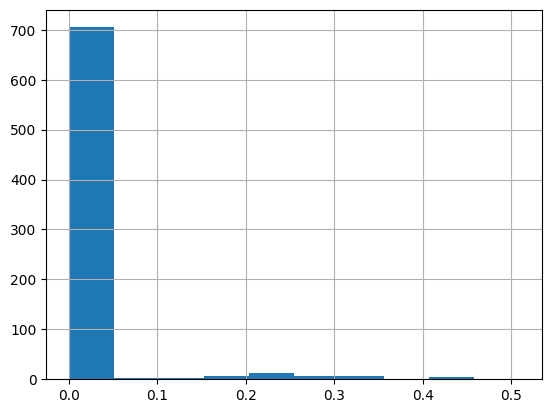

In [ ]:
df1['time'].hist()

In [ ]:
#split the dataset

#train dataset by splitting the data
train_reviews = reviewsP.Review[:500]
train_sentiments = reviewsP.Sentiment[:500]

#test dataset
test_reviews = reviewsP.Review[248:]
test_sentiments = reviewsP.Sentiment[248:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(500,) (500,)
(500,) (500,)


In [ ]:
#Tfidf vectorizer
#tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
tv=TfidfVectorizer()

#transformed train reviews
tv_train_reviews=tv.fit_transform(train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (500, 1952)
Tfidf_test: (500, 1952)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

NB_tfidf accuracy : 0.852
roc_auc_score for NB:  0.8626262626262626
[[218   7]
 [ 67 208]] 

              precision    recall  f1-score   support

    Positive       0.76      0.97      0.85       225
    Negative       0.97      0.76      0.85       275

    accuracy                           0.85       500
   macro avg       0.87      0.86      0.85       500
weighted avg       0.88      0.85      0.85       500



Text(0.5, 1.0, 'Confusion Matrix for Naïve Bayes')

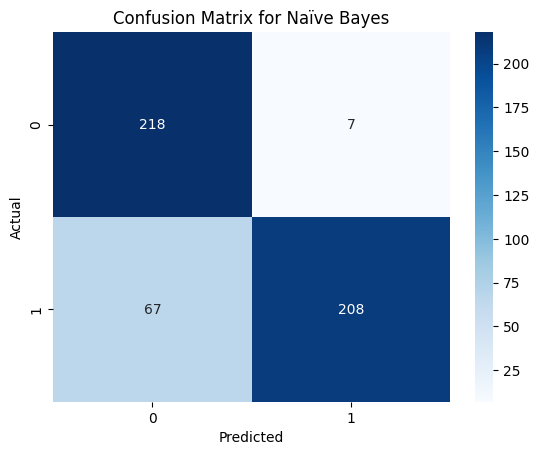

In [ ]:
############################################
###             Naive Bayes              ###
############################################

NB = MultinomialNB()

#Fitting the model for tfidf features
NB_tfidf = NB.fit(tv_train_reviews,train_sentiments)

#Predicting the model for tfidf features
NB_tfidf_predict = NB.predict(tv_test_reviews)

#Accuracy score for tfidf features
NB_tfidf_score=accuracy_score(test_sentiments,NB_tfidf_predict)
print("NB_tfidf accuracy :",NB_tfidf_score)
FP, TP, threshold1 = roc_curve(test_sentiments, NB_tfidf_predict)
print('roc_auc_score for NB: ', roc_auc_score(test_sentiments, NB_tfidf_predict))

#Classification report for tfidf features
NB_tfidf_report=classification_report(test_sentiments,NB_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,NB_tfidf_predict), '\n')
print(NB_tfidf_report)

sns.heatmap(confusion_matrix(test_sentiments, NB_tfidf_predict), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naïve Bayes')

kNN_tfidf accuracy : 0.774
roc_auc_score for kNN:  0.7682828282828283
[[160  65]
 [ 48 227]] 

              precision    recall  f1-score   support

    Positive       0.77      0.71      0.74       225
    Negative       0.78      0.83      0.80       275

    accuracy                           0.77       500
   macro avg       0.77      0.77      0.77       500
weighted avg       0.77      0.77      0.77       500



Text(0.5, 1.0, 'Confusion Matrix for K-Nearest Neighbour')

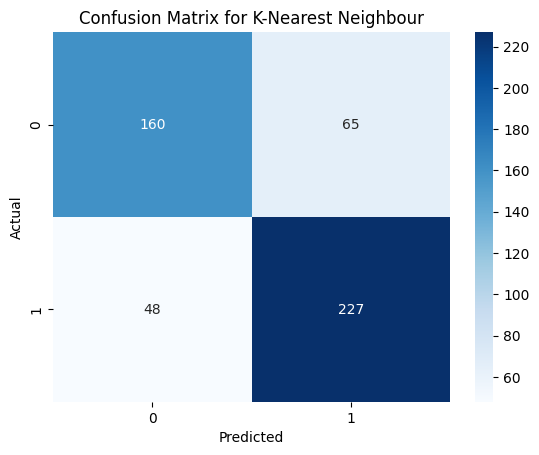

In [ ]:
############################################
###                  k-NN                ###
############################################

kNN = KNeighborsClassifier(n_neighbors=7)

#Fitting the model for tfidf features
kNN_tfidf = kNN.fit(tv_train_reviews,train_sentiments)

#Predicting the model for tfidf features
kNN_tfidf_predict = kNN.predict(tv_test_reviews)

#Accuracy score for tfidf features
kNN_tfidf_score=accuracy_score(test_sentiments,kNN_tfidf_predict)
print("kNN_tfidf accuracy :",kNN_tfidf_score)
FP, TP, threshold1 = roc_curve(test_sentiments, kNN_tfidf_predict)
print('roc_auc_score for kNN: ', roc_auc_score(test_sentiments, kNN_tfidf_predict))

#Classification report for tfidf features
kNN_tfidf_report=classification_report(test_sentiments,kNN_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,kNN_tfidf_predict), '\n')
print(kNN_tfidf_report)

sns.heatmap(confusion_matrix(test_sentiments, kNN_tfidf_predict), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for K-Nearest Neighbour')

SVM_tfidf accuracy : 0.866
roc_auc_score for SVM:  0.8713131313131314
[[208  17]
 [ 50 225]] 

              precision    recall  f1-score   support

    Positive       0.81      0.92      0.86       225
    Negative       0.93      0.82      0.87       275

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine')

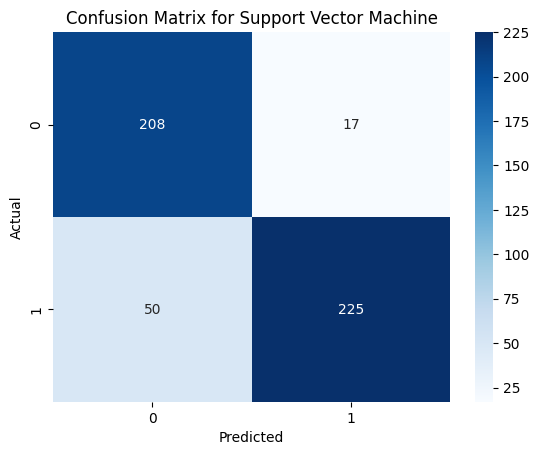

In [ ]:
############################################
###                  SVM                 ###
############################################
#linear SVM
SVM = SGDClassifier(loss='hinge',max_iter=500,random_state=42)

#Fitting the model for tfidf features
SVM_tfidf = SVM.fit(tv_train_reviews,train_sentiments)

#Predicting the model for tfidf features
SVM_tfidf_predict = SVM.predict(tv_test_reviews)

#Accuracy score for tfidf features
SVM_tfidf_score=accuracy_score(test_sentiments,SVM_tfidf_predict)
print("SVM_tfidf accuracy :",SVM_tfidf_score)
FP, TP, threshold1 = roc_curve(test_sentiments, SVM_tfidf_predict)
print('roc_auc_score for SVM: ', roc_auc_score(test_sentiments, SVM_tfidf_predict))
#Classification report for tfidf features
SVM_tfidf_report=classification_report(test_sentiments,SVM_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,SVM_tfidf_predict), '\n')
print(SVM_tfidf_report)

sns.heatmap(confusion_matrix(test_sentiments, SVM_tfidf_predict), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Support Vector Machine')

DT_tfidf accuracy : 0.85
[[195  30]
 [ 45 230]] 

              precision    recall  f1-score   support

    Positive       0.81      0.87      0.84       225
    Negative       0.88      0.84      0.86       275

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500

roc_auc_score for DT:  0.8515151515151516


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree')

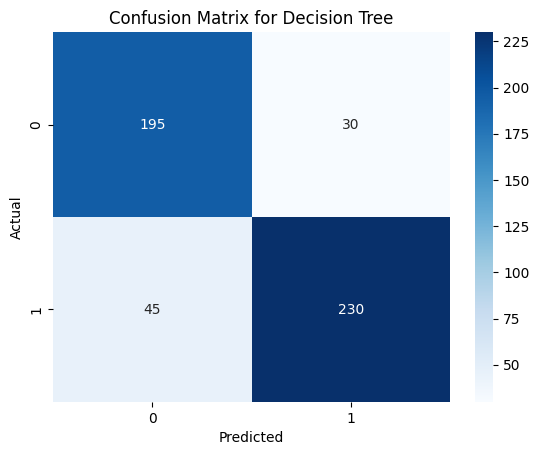

In [ ]:
############################################
###           Decision Tree              ###
############################################
#training the model

from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier(criterion ='entropy', random_state= 0)

#Fitting the model for tfidf features
DT_tfidf=DT.fit(tv_train_reviews,train_sentiments)

##Predicting the model for tfidf features
DT_tfidf_predict=DT.predict(tv_test_reviews)

#Accuracy score for tfidf features
DT_tfidf_score=accuracy_score(test_sentiments,DT_tfidf_predict)
print("DT_tfidf accuracy :",DT_tfidf_score)

#Classification report for tfidf features
DT_tfidf_report=classification_report(test_sentiments,DT_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,DT_tfidf_predict), '\n')
print(DT_tfidf_report)

#AUC score and ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

FP, TP, threshold1 = roc_curve(test_sentiments, DT_tfidf_predict)
print('roc_auc_score for DT: ', roc_auc_score(test_sentiments, DT_tfidf_predict))

sns.heatmap(confusion_matrix(test_sentiments, DT_tfidf_predict), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')


LR_tfidf accuracy : 0.854
roc_auc_score for LR:  0.8632323232323232
[[215  10]
 [ 63 212]] 

              precision    recall  f1-score   support

    Positive       0.77      0.96      0.85       225
    Negative       0.95      0.77      0.85       275

    accuracy                           0.85       500
   macro avg       0.86      0.86      0.85       500
weighted avg       0.87      0.85      0.85       500



Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

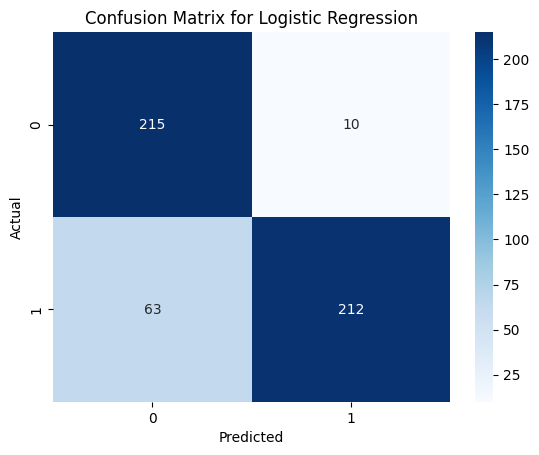

In [ ]:
##############################################
##          Logistic Regression            ###
##############################################

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

LR_tfidf = LR.fit(tv_train_reviews,train_sentiments)

LR_tfidf_predict = LR.predict(tv_test_reviews)

LR_tfidf_score=accuracy_score(test_sentiments,LR_tfidf_predict)
print("LR_tfidf accuracy :",LR_tfidf_score)
FP, TP, threshold1 = roc_curve(test_sentiments, LR_tfidf_predict)
print('roc_auc_score for LR: ', roc_auc_score(test_sentiments, LR_tfidf_predict))

LR_tfidf_report=classification_report(test_sentiments,LR_tfidf_predict,target_names=['Positive','Negative'])
print(confusion_matrix(test_sentiments,LR_tfidf_predict), '\n')
print(LR_tfidf_report)

sns.heatmap(confusion_matrix(test_sentiments, LR_tfidf_predict), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')

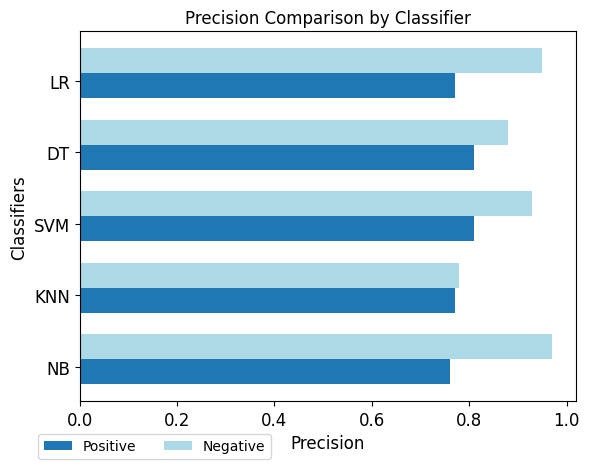

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = ['NB', 'KNN', 'SVM', 'DT', 'LR' ]
precision_positive = [0.76, 0.77, 0.81,0.81, 0.77 ]
precision_negative = [0.97, 0.78, 0.93, 0.88, 0.95 ]

bar_width = 0.35
index = np.arange(len(classifiers))

plt.barh(index, precision_positive, bar_width, label='Positive')
plt.barh(index + bar_width, precision_negative, bar_width, label='Negative', color='lightblue')

plt.xlabel('Precision', fontsize=12)
plt.ylabel('Classifiers', fontsize=12)
plt.yticks(index + bar_width / 5, classifiers, fontsize=12)
plt.xticks(fontsize=12)
plt.title('Precision Comparison by Classifier', fontsize=12)
plt.legend(bbox_to_anchor=(0.4, -0.07), ncol=2)
plt.show()


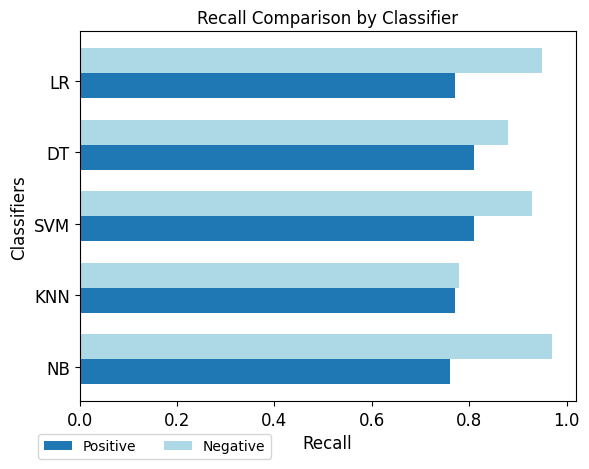

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = ['NB', 'KNN', 'SVM', 'DT', 'LR' ]
recall_positive = [0.97, 0.71, 0.92,0.87, 0.96 ]
recall_negative = [0.76, 0.83, 0.82, 0.84, 0.77 ]

bar_width = 0.35
index = np.arange(len(classifiers))

plt.barh(index, precision_positive, bar_width, label='Positive')
plt.barh(index + bar_width, precision_negative, bar_width, label='Negative', color='lightblue')

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Classifiers', fontsize=12)
plt.yticks(index + bar_width / 5, classifiers, fontsize=12)
plt.xticks(fontsize=12)
plt.title('Recall Comparison by Classifier', fontsize=12)
plt.legend(bbox_to_anchor=(0.4, -0.07), ncol=2)
plt.show()

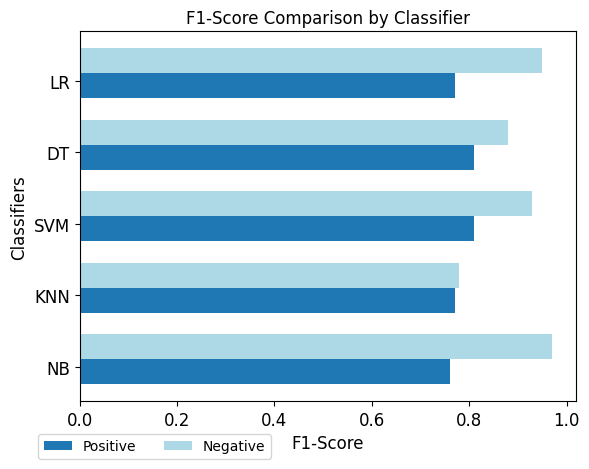

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = ['NB', 'KNN', 'SVM', 'DT', 'LR' ]
recall_positive = [0.85, 0.74, 0.86,0.84, 0.85 ]
recall_negative = [0.85, 0.80, 0.87, 0.86, 0.85 ]

bar_width = 0.35
index = np.arange(len(classifiers))

plt.barh(index, precision_positive, bar_width, label='Positive')
plt.barh(index + bar_width, precision_negative, bar_width, label='Negative', color='lightblue')

plt.xlabel('F1-Score', fontsize=12)
plt.ylabel('Classifiers', fontsize=12)
plt.yticks(index + bar_width / 5, classifiers, fontsize=12)
plt.xticks(fontsize=12)
plt.title('F1-Score Comparison by Classifier', fontsize=12)
plt.legend(bbox_to_anchor=(0.4, -0.07), ncol=2)
plt.show()

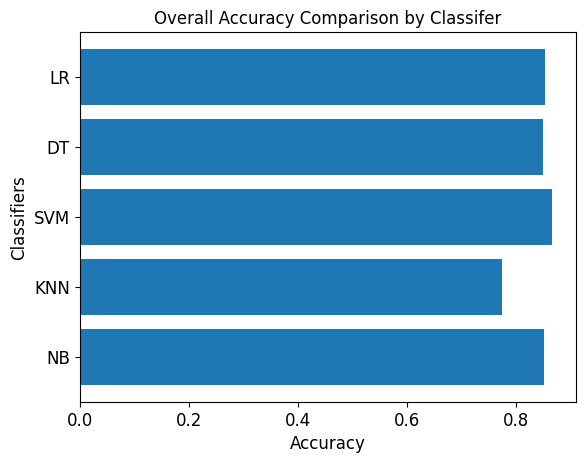

In [ ]:
Accuracy = ({'NB': 0.852,
             'KNN': 0.774,
             'SVM': 0.866,
             'DT': 0.850,
             'LR': 0.854})

plt.barh(list(Accuracy.keys()), list(Accuracy.values()))
plt.title('Overall Accuracy Comparison by Classifer')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Classifiers', fontsize=12)
plt.xlabel('Accuracy', fontsize=12)
plt.show()

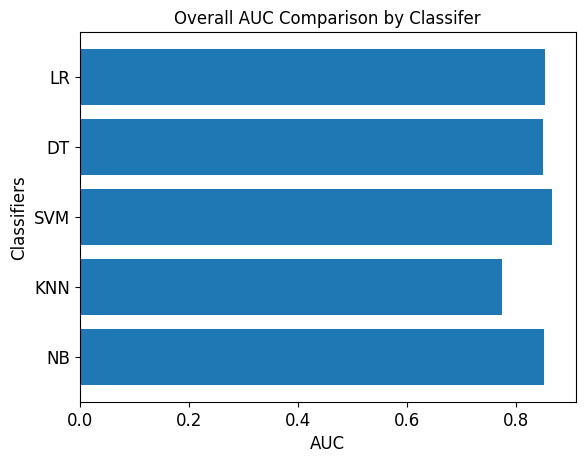

In [ ]:
AUC= ({'NB': 0.863,
             'KNN': 0.768,
             'SVM': 0.871,
             'DT': 0.852,
             'LR': 0.863})

plt.barh(list(Accuracy.keys()), list(Accuracy.values()))
plt.title('Overall AUC Comparison by Classifer')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Classifiers', fontsize=12)
plt.xlabel('AUC', fontsize=12)
plt.show()

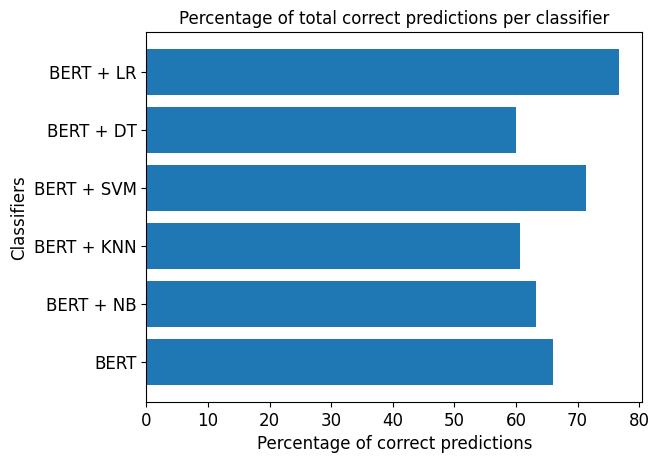

In [12]:
Accuracy = ({'BERT': 66,
             'BERT + NB': 63.33,
             'BERT + KNN': 60.67,
             'BERT + SVM': 71.33,
             'BERT + DT': 60,
             'BERT + LR': 76.67})

plt.barh(list(Accuracy.keys()), list(Accuracy.values()))
plt.title('Percentage of total correct predictions per classifier')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Classifiers', fontsize=12)
plt.xlabel('Percentage of correct predictions', fontsize=12)
plt.show()

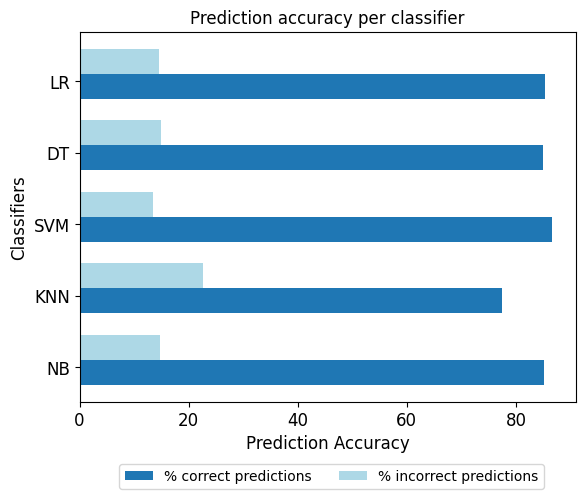

In [1]:
import matplotlib.pyplot as plt
import numpy as np

classifiers = ['NB', 'KNN', 'SVM', 'DT', 'LR' ]
percentage_correct = [85.2, 77.40, 86.6, 85, 85.40 ]
percentage_incorrect = [14.8, 22.6, 13.4, 15, 14.6 ]

bar_width = 0.35
index = np.arange(len(classifiers))

plt.barh(index, percentage_correct, bar_width, label='% correct predictions')
plt.barh(index + bar_width, percentage_incorrect, bar_width, label='% incorrect predictions', color='lightblue')

plt.xlabel('Prediction Accuracy', fontsize=12)
plt.ylabel('Classifiers', fontsize=12)
plt.yticks(index + bar_width / 5, classifiers, fontsize=12)
plt.xticks(fontsize=12)
plt.title('Prediction accuracy per classifier', fontsize=12)
plt.legend(bbox_to_anchor=(0.95, -0.15), ncol=2)
plt.show()

### **BERT WITH FINE-TUNING**

In [ ]:
pip install tensorflow_text

In [ ]:
!pip install tensorflow==2.15.1
!pip install tensorflow-text==2.15.0
!pip install tf-models-official==2.15
!pip install transformers==4.24.0

In [ ]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

In [ ]:
reviews = 'imdb_labelled.txt'
reviews = pd.read_csv(reviews, delimiter='\t', header=None, names=['text','label'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
label = enc.fit_transform(reviews['label'])
print(label[:10])
print(reviews['text'][:10])

[0 0 0 0 1 0 0 1 0 1]
0    A very, very, very slow-moving, aimless movie ...
1    Not sure who was more lost - the flat characte...
2    Attempting artiness with black & white and cle...
3         Very little music or anything to speak of.  
4    The best scene in the movie was when Gerardo i...
5    The rest of the movie lacks art, charm, meanin...
6                                  Wasted two hours.  
7    Saw the movie today and thought it was a good ...
8                                 A bit predictable.  
9    Loved the casting of Jimmy Buffet as the scien...
Name: text, dtype: object


In [ ]:
reviews = list(zip(reviews['text'], reviews['label']))

reviews = pd.DataFrame (reviews, columns = ['Review', 'Sentiment'])
reviews

Review  Sentiment
0    A very, very, very slow-moving, aimless movie ...          0
1    Not sure who was more lost - the flat characte...          0
2    Attempting artiness with black & white and cle...          0
3         Very little music or anything to speak of.            0
4    The best scene in the movie was when Gerardo i...          1
..                                                 ...        ...
743  I just got bored watching Jessice Lange take h...          0
744  Unfortunately, any virtue in this film's produ...          0
745                   In a word, it is embarrassing.            0
746                               Exceptionally bad!            0
747  All in all its an insult to one's intelligence...          0

[748 rows x 2 columns]

In [ ]:
reviews.head()

Review  Sentiment
0  A very, very, very slow-moving, aimless movie ...          0
1  Not sure who was more lost - the flat characte...          0
2  Attempting artiness with black & white and cle...          0
3       Very little music or anything to speak of.            0
4  The best scene in the movie was when Gerardo i...          1

In [ ]:
reviews.shape

(748, 2)

In [ ]:
from sklearn.model_selection import train_test_split

#split and take the test set
X, X_test, y, y_test = (train_test_split(reviews['Review'], reviews['Sentiment'],
                                                     stratify=reviews['Sentiment'],
                                                     test_size=0.2,
                                                     train_size=0.8
                                                     ))


In [ ]:

#split the train set (X) into train and validation
X_train, X_val, y_train, y_val = (train_test_split(X, y,
                                                     stratify=y,
                                                     test_size=0.25,
                                                     train_size=0.75
                                                     ))


In [ ]:
X_train

327    From here on the Widmark character turns unint...
69     There was NO chemistry between Ben Affleck and...
176    If you see it, you should probably just leave ...
734                      ;) Recommend with confidence!  
554              Meredith M was better than all right.  
                             ...                        
612    Of course the footage from the 70s was grainy,...
363            The movie is terribly boring in places.  
204    It was very popular when I was in the cinema, ...
515    The success of the film depends on the casting...
63                                          Brilliant!  
Name: Review, Length: 448, dtype: object

In [ ]:
X_val

699    It's a gloriously fun, fast paced and fairly a...
12     The Songs Were The Best And The Muppets Were S...
399    Every single character was hilarious and deser...
79     These are the central themes of the film and t...
193                This is high adventure at its best.  
                             ...                        
549    Aailiyah was pretty good as Akasha, in places ...
383    However, here there was no decent acting, acti...
112                     I mean this in a terrible way.  
99                     THERE IS NO PLOT OR STORYLINE!!  
385    It failed to convey the broad sweep of landsca...
Name: Review, Length: 150, dtype: object

In [ ]:
X_test

705    It showed exactly how the government and the s...
653    One of the most boring,pointless movies I have...
556    It is rare when a film-maker takes the time to...
625    I struggle to find anything bad to say about i...
260    This gets a 1 out of 10, simply because there'...
                             ...                        
154                                    It is shameful.  
365                    The film looks cheap and bland.  
384                       Filmiing was less expansive.  
529                       The transfers are very good.  
715    Definitely worth seeing
 it's the sort of thou...
Name: Review, Length: 150, dtype: object

In [ ]:
#@title Choose a BERT model to fine-tune

#the model has 5 layers (L), 512 hidden size H and 8 attention heads
bert_model_name = 'small_bert/bert_en_uncased_L-4_H-512_A-8'

map_name_to_handle = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1',
}

map_model_to_preprocess = {
    'small_bert/bert_en_uncased_L-4_H-512_A-8':
        'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3',
}

tfhub_handle_encoder = map_name_to_handle[bert_model_name]
tfhub_handle_preprocess = map_model_to_preprocess[bert_model_name]

print(f'BERT model selected           : {tfhub_handle_encoder}')
print(f'Preprocess model auto-selected: {tfhub_handle_preprocess}')

BERT model selected           : https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Preprocess model auto-selected: https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3


In [ ]:
bert_preprocess_model = hub.KerasLayer(tfhub_handle_preprocess)

In [ ]:
reviews.head()

Review  Sentiment
0  A very, very, very slow-moving, aimless movie ...          0
1  Not sure who was more lost - the flat characte...          0
2  Attempting artiness with black & white and cle...          0
3       Very little music or anything to speak of.            0
4  The best scene in the movie was when Gerardo i...          1

In [ ]:
reviews['Review'][135]

'You\'ll love it!  \t1\nThis movie is BAD.  \t0\nSo bad.  \t0\nThe film is way too long.  \t0\nThis is definitely one of the bad ones.  \t0\nThe movie I received was a great quality film for it\'s age.  \t1\nJohn Wayne did an incredible job for being so young in the movie industry.  \t1\nHis on screen presence shined thought even though there were other senior actors on the screen with him.  \t1\nI think that it is a must see older John Wayne film.  \t1\nI really don\'t see how anyone could enjoy this movie.  \t0\nI don\'t think I\'ve ever seen a movie half as boring as this self-indulgent piece of junk.  \t0\nIt probably would have been better if the director hadn\'t spent most of the movie showcasing his own art work, which really isn\'t that noteworthy.  \t0\nAnother thing I didn\'t really like is when a character got punched in the face, a gallon of blood would spew forth soon after.  \t0\nJamie Foxx absolutely IS Ray Charles.  \t1\nHis performance is simply genius.  \t1\nHe owns t

In [ ]:
text_test = ["You'll love it! 1 This movie is BAD. 0 So bad. 0 The film is way too long. 0 This is definitely one of the bad ones. 0 The movie I received was a great quality film for it's age. 1 John Wayne did an incredible job for being so young in the movie industry. 1 His on screen presence shined thought even though there were other senior actors on the screen with him. 1 I think that it is a must see older John Wayne film. 1 I really don't see how anyone could enjoy this movie. 0 I don't think I've ever seen a movie half as boring as this self-indulgent piece of junk. 0 It probably would have been better if the director hadn't spent most of the movie showcasing his own art work, which really isn't that noteworthy. 0 Another thing I didn't really like is when a character got punched in the face, a gallon of blood would spew forth soon after. 0 Jamie Foxx absolutely IS Ray Charles. 1 His performance is simply genius. 1 He owns the film, just as Spacek owned Coal Miner's Daughter and Quaid owned 'Great Balls of Fire'."]
text_preprocessed = bert_preprocess_model(text_test)

print(f'Keys       : {list(text_preprocessed.keys())}')
print(f'Shape      : {text_preprocessed["input_word_ids"].shape}')
print(f'Word Ids   : {text_preprocessed["input_word_ids"][0, :12]}')
print(f'Input Mask : {text_preprocessed["input_mask"][0, :12]}')
print(f'Type Ids   : {text_preprocessed["input_type_ids"][0, :12]}')

Keys       : ['input_type_ids', 'input_mask', 'input_word_ids']
Shape      : (1, 128)
Word Ids   : [ 101 2017 1005 2222 2293 2009  999 1015 2023 3185 2003 2919]
Input Mask : [1 1 1 1 1 1 1 1 1 1 1 1]
Type Ids   : [0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
bert_model = hub.KerasLayer(tfhub_handle_encoder)

In [ ]:
bert_results = bert_model(text_preprocessed)

print(f'Loaded BERT: {tfhub_handle_encoder}')
print(f'Pooled Outputs Shape:{bert_results["pooled_output"].shape}')
print(f'Pooled Outputs Values:{bert_results["pooled_output"][0, :12]}')
print(f'Sequence Outputs Shape:{bert_results["sequence_output"].shape}')
print(f'Sequence Outputs Values:{bert_results["sequence_output"][0, :12]}')

Loaded BERT: https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Pooled Outputs Shape:(1, 512)
Pooled Outputs Values:[-0.21379893  0.9819219   0.03118744  0.39816505  0.05605773  0.51842237
  0.9794966  -0.697697   -0.29652932 -0.83605206 -0.10906498 -0.9743439 ]
Sequence Outputs Shape:(1, 128, 512)
Sequence Outputs Values:[[-0.17771217 -0.46686974  1.117028   ... -0.4620121  -0.27941173
  -0.76223785]
 [ 0.26618707  0.35815406 -0.6615051  ... -0.37415522  0.66076803
   0.07755838]
 [-0.10607661  0.17535329  0.7551345  ... -0.9959797   0.7178981
   0.19915709]
 ...
 [-0.16459772 -0.13632388  0.38057974 ... -0.04955063  0.5925052
   0.6358404 ]
 [ 0.07605699  1.3630676  -0.54669464 ... -0.4791602   0.07082902
  -0.24462238]
 [ 0.02116366 -0.29681924  0.26406676 ... -0.42550278 -0.5195599
  -0.41146797]]


In [ ]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer(tfhub_handle_preprocess, name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer(tfhub_handle_encoder, trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)


In [ ]:
 classifier_model = build_classifier_model()

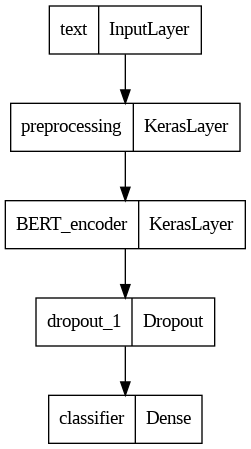

In [ ]:
tf.keras.utils.plot_model(classifier_model)

In [ ]:
epochs = 6
steps_per_epoch = 448  #corresponding to the train set size
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps) #10% of num_train_steps

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')


In [ ]:
#fine-tune BERT for classification
classifier_model.compile(optimizer,
                     loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                     metrics=[tf.keras.metrics.BinaryAccuracy()])
classifier_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 preprocessing (KerasLayer)  {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                            

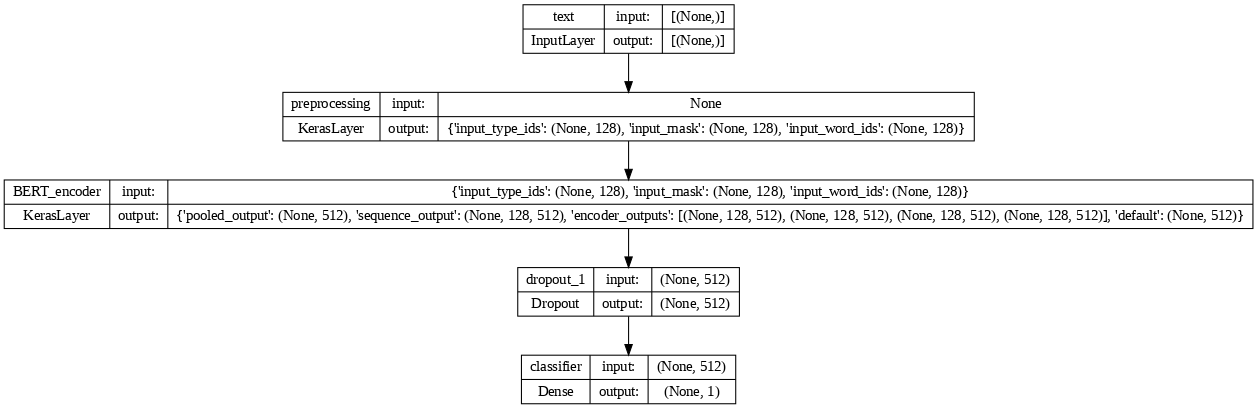

In [ ]:
tf.keras.utils.plot_model(model=classifier_model,show_shapes=True,dpi=76)

In [ ]:
print(f'Training model with {tfhub_handle_encoder}')
history = classifier_model.fit(X_train,
                               y_train,
                               validation_data=(X_val, y_val),
                               epochs=epochs)

Training model with https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1
Epoch 1/6
14/14 [==============================] - 177s 12s/step - loss: 0.8164 - binary_accuracy: 0.4821 - val_loss: 0.8339 - val_binary_accuracy: 0.4667
Epoch 2/6
14/14 [==============================] - 163s 12s/step - loss: 0.7788 - binary_accuracy: 0.4888 - val_loss: 0.7487 - val_binary_accuracy: 0.4533
Epoch 3/6
14/14 [==============================] - 164s 12s/step - loss: 0.7075 - binary_accuracy: 0.5424 - val_loss: 0.6891 - val_binary_accuracy: 0.5400
Epoch 4/6
14/14 [==============================] - 171s 12s/step - loss: 0.6422 - binary_accuracy: 0.6071 - val_loss: 0.6280 - val_binary_accuracy: 0.5733
Epoch 5/6
14/14 [==============================] - 170s 12s/step - loss: 0.5755 - binary_accuracy: 0.6562 - val_loss: 0.5740 - val_binary_accuracy: 0.6600
Epoch 6/6
14/14 [==============================] - 161s 12s/step - loss: 0.5422 - binary_accuracy: 0.6964 - val_loss: 0.5226 - val_bi

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


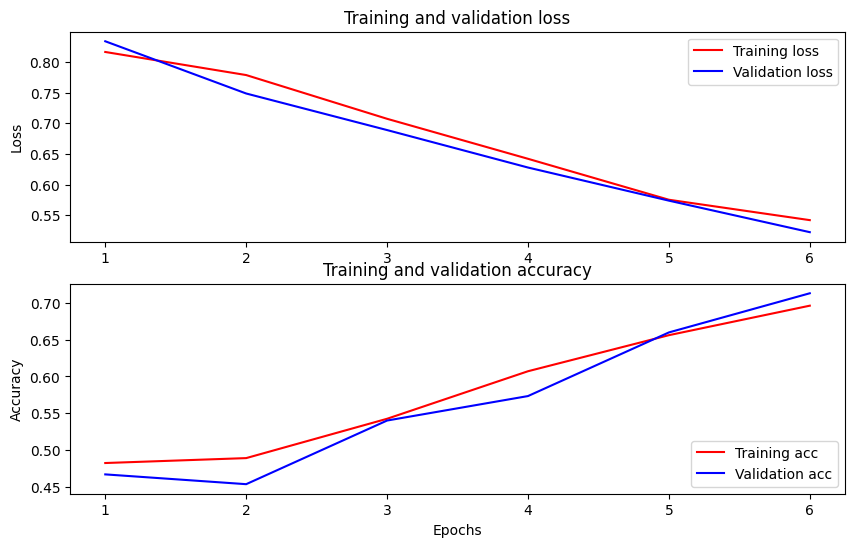

In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
loss, accuracy = classifier_model.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

5/5 [==============================] - 14s 3s/step - loss: 0.5913 - binary_accuracy: 0.7267
Loss: 0.5912888050079346
Accuracy: 0.7266666889190674


In [ ]:
#performance metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#predicted values using the model
y_pred=classifier_model.predict(X_test)

5/5 [==============================] - 14s 3s/step


In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score

# Convert y_pred to binary predictions
y_pred_binary = np.where(y_pred >= 0, 1, 0)  # Thresholding at 0, you might adjust this

print(confusion_matrix(y_test, y_pred_binary), '\n')
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_binary))
#print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_binary))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_binary)), '\n')

print(classification_report(y_test, y_pred_binary))
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print("AUC:", roc_auc_score(y_test, y_pred_binary))

[[50 23]
 [28 49]] 

              precision    recall  f1-score   support

           0       0.64      0.68      0.66        73
           1       0.68      0.64      0.66        77

    accuracy                           0.66       150
   macro avg       0.66      0.66      0.66       150
weighted avg       0.66      0.66      0.66       150

Accuracy: 0.66
AUC: 0.6606475716064757


In [ ]:
import tensorflow_hub as hub
import tensorflow_text

bert_preprocess_model = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_model = hub.KerasLayer('https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-4_H-512_A-8/1')

def get_bert_embeddings(texts):
    preprocessed_texts = bert_preprocess_model(texts)
    embeddings = bert_model(preprocessed_texts)['pooled_output']
    return embeddings.numpy()


In [ ]:
X_train_embeddings = get_bert_embeddings(X_train)
X_test_embeddings = get_bert_embeddings(X_test)

y_train = y_train
y_test = y_test


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

nb_model = GaussianNB()
nb_model.fit(X_train_embeddings, y_train)

y_pred_nb = nb_model.predict(X_test_embeddings)

print(classification_report(y_test, y_pred_nb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print("AUC", roc_auc_score(y_test, y_pred_nb))
print("Accuracy", accuracy_score(y_test, y_pred_nb))


              precision    recall  f1-score   support

           0       0.59      0.82      0.69        73
           1       0.73      0.45      0.56        77

    accuracy                           0.63       150
   macro avg       0.66      0.64      0.62       150
weighted avg       0.66      0.63      0.62       150

Confusion Matrix:
[[60 13]
 [42 35]]
AUC 0.6382316313823162
Accuracy 0.6333333333333333


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_embeddings, y_train)

# Predict
y_pred_knn = knn_model.predict(X_test_embeddings)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

# Evaluate
print(classification_report(y_test, y_pred_knn))
print("AUC", roc_auc_score(y_test, y_pred_knn))
print("Accuracy", accuracy_score(y_test, y_pred_knn))

Confusion Matrix:
[[44 29]
 [30 47]]
              precision    recall  f1-score   support

           0       0.59      0.60      0.60        73
           1       0.62      0.61      0.61        77

    accuracy                           0.61       150
   macro avg       0.61      0.61      0.61       150
weighted avg       0.61      0.61      0.61       150

AUC 0.6065646682085039
Accuracy 0.6066666666666667


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_embeddings, y_train)

# Predict
y_pred_dt = dt_model.predict(X_test_embeddings)

# Evaluate
print(classification_report(y_test, y_pred_dt))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("AUC", roc_auc_score(y_test, y_pred_dt))
print("Accuracy", accuracy_score(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.58      0.66      0.62        73
           1       0.63      0.55      0.58        77

    accuracy                           0.60       150
   macro avg       0.60      0.60      0.60       150
weighted avg       0.60      0.60      0.60       150

Confusion Matrix:
[[48 25]
 [35 42]]
AUC 0.6014943960149439
Accuracy 0.6


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_embeddings, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test_embeddings)

# Evaluate
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("AUC", roc_auc_score(y_test, y_pred_lr))
print("Accuracy", accuracy_score(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.76      0.77      0.76        73
           1       0.78      0.77      0.77        77

    accuracy                           0.77       150
   macro avg       0.77      0.77      0.77       150
weighted avg       0.77      0.77      0.77       150

Confusion Matrix:
[[56 17]
 [18 59]]
AUC 0.7666785269524996
Accuracy 0.7666666666666667


In [ ]:
from sklearn.svm import SVC

# Train SVM
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_embeddings, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test_embeddings)

# Evaluate
print(classification_report(y_test, y_pred_svm))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

print("AUC", roc_auc_score(y_test, y_pred_svm))
print("Accuracy", accuracy_score(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.71      0.70      0.70        73
           1       0.72      0.73      0.72        77

    accuracy                           0.71       150
   macro avg       0.71      0.71      0.71       150
weighted avg       0.71      0.71      0.71       150

Confusion Matrix:
[[51 22]
 [21 56]]
AUC 0.7129514321295143
Accuracy 0.7133333333333334


### **TOPIC DETECTION**

In [ ]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import nltk
import string

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [43]:
reviews = 'imdb_labelled.txt'
reviews = pd.read_csv(reviews, delimiter='\t', header=None, names=['text','label'])

In [44]:
reviews.head()

text  label
0  A very, very, very slow-moving, aimless movie ...      0
1  Not sure who was more lost - the flat characte...      0
2  Attempting artiness with black & white and cle...      0
3       Very little music or anything to speak of.        0
4  The best scene in the movie was when Gerardo i...      1

In [47]:
reviews["Text_len"] = reviews["text"].apply(lambda x : len(x.split()))

In [50]:
text = reviews['text']

text1 = []

for review in text:
    #print(sentence)
    #remove punctuation
    review = review.translate(str.maketrans('', '', string.punctuation))
    # remove digits/numbers
    review = review.translate(str.maketrans('', '', string.digits))
    #change to lowercase
    review = review.lower()
    #tokenise
    review = nltk.word_tokenize(review)

    #print(sentence)
    text1.append(review)


text1[:2]

[['a',
  'very',
  'very',
  'very',
  'slowmoving',
  'aimless',
  'movie',
  'about',
  'a',
  'distressed',
  'drifting',
  'young',
  'man'],
 ['not',
  'sure',
  'who',
  'was',
  'more',
  'lost',
  'the',
  'flat',
  'characters',
  'or',
  'the',
  'audience',
  'nearly',
  'half',
  'of',
  'whom',
  'walked',
  'out']]

In [51]:
text1 = pd.Series(text1)
text1[:2]

0    [a, very, very, very, slowmoving, aimless, mov...
1    [not, sure, who, was, more, lost, the, flat, c...
dtype: object

In [53]:
#remove stop words
nltk.download('stopwords')

from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['film','movie', 'get', 'see', 'make', 'one']
stopwords.extend(newStopWords)

#Setting English stopwords
stop_words = set(stopwords)

#text = reviews['Text']
text2 = text1.apply(lambda x: ' '.join(term for term in x if term not in stop_words))
text2[:5]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0     slowmoving aimless distressed drifting young man
1    sure lost flat characters audience nearly half...
2    attempting artiness black white clever camera ...
3                          little music anything speak
4    best scene gerardo trying find song keeps runn...
dtype: object

In [54]:
#apply lemmatising with POS tags

nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer


from nltk.corpus import wordnet

def get_wordnet_pos(word):
    #Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
text3 = text2.apply(lambda x:' '.join(lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in x.split()))
text3[:2]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0        slowmoving aimless distressed drift young man
1    sure lose flat character audience nearly half ...
dtype: object

In [56]:
reviews['Text'] = text3
reviews=reviews.drop('text', axis=1)
reviews.head()

label  Text_len                                               Text
0      0        13      slowmoving aimless distressed drift young man
1      0        19  sure lose flat character audience nearly half ...
2      0        31  attempt artiness black white clever camera ang...
3      0         8                        little music anything speak
4      1        21     best scene gerardo try find song keep run head

## **BERT TOPIC**

In [57]:
from bertopic import BERTopic

#default uses HDBSCAN
model = BERTopic(verbose=True, embedding_model='paraphrase-MiniLM-L3-v2', top_n_words=10)
review_topics, probs = model.fit_transform(reviews.Text)

# Reduce to exactly 10 topics
model.reduce_topics(reviews.Text, nr_topics=10)


2025-01-17 21:59:17,946 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/24 [00:00<?, ?it/s]

2025-01-17 21:59:23,879 - BERTopic - Embedding - Completed ✓
2025-01-17 21:59:23,884 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-17 21:59:26,336 - BERTopic - Dimensionality - Completed ✓
2025-01-17 21:59:26,338 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-17 21:59:26,374 - BERTopic - Cluster - Completed ✓
2025-01-17 21:59:26,381 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-17 21:59:26,425 - BERTopic - Representation - Completed ✓
2025-01-17 21:59:26,475 - BERTopic - Topic reduction - Reducing number of topics
2025-01-17 21:59:26,508 - BERTopic - Topic reduction - Reduced number of topics from 16 to 10


In [58]:
freq = model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq.head()

Number of topics: 10


Topic  Count                            Name  \
0     -1    345    -1_good_bad_character_script   
1      0    104          0_watch_film_movie_bad   
2      1     81    1_actor_character_cast_funny   
3      2     76      2_bad_awful_torture_stupid   
4      3     47  3_great_excellent_give_awesome   

                                      Representation  \
0  [good, bad, character, script, scene, look, ti...   
1  [watch, film, movie, bad, like, ever, great, r...   
2  [actor, character, cast, funny, well, played, ...   
3  [bad, awful, torture, stupid, dont, frighten, ...   
4  [great, excellent, give, awesome, brilliant, d...   

                                 Representative_Docs  
0  [line seem write fifteen year old though try o...  
1  [structure easily tightly construct history ci...  
2  [character flesh surprisingly well particularl...  
3                                [awful, bad, awful]  
4  [act alongside olivia de havilland brilliant e...

In [59]:
freq.head(10)

Topic  Count                                Name  \
0     -1    345        -1_good_bad_character_script   
1      0    104              0_watch_film_movie_bad   
2      1     81        1_actor_character_cast_funny   
3      2     76          2_bad_awful_torture_stupid   
4      3     47      3_great_excellent_give_awesome   
5      4     33         4_waste_boring_time_garbage   
6      5     19            5_music_speak_sound_song   
7      6     15  6_recommend_worth_check_definitely   
8      7     15              7_plot_line_doesnt_way   
9      8     13         8_act_balance_least_however   

                                      Representation  \
0  [good, bad, character, script, scene, look, ti...   
1  [watch, film, movie, bad, like, ever, great, r...   
2  [actor, character, cast, funny, well, played, ...   
3  [bad, awful, torture, stupid, dont, frighten, ...   
4  [great, excellent, give, awesome, brilliant, d...   
5  [waste, boring, time, garbage, dont, trash, sh...   
6  [music, speak, sound, song, score, soundtrack,...   
7  [recommend, worth, check, definitely, advise, ...   
8  [plot, line, doesnt, way, hoot, astonishingly,...   
9  [act, balance, least, however, cast, nimoy, re...   

                                 Representative_Docs  
0  [line seem write fifteen year old though try o...  
1  [structure easily tightly construct history ci...  
2  [character flesh surprisingly well particularl...  
3                                [awful, bad, awful]  
4  [act alongside olivia de havilland brilliant e...  
5  [otherwise dont even waste time, top line dont...  
6  [dont yet hear mickey speak ton sound effect m...  
7   [see definitely recommend, recommend, recommend]  
8  [secondary plot line incomprehensible relation...  
9  [however decent act action location work balan...

In [83]:
a_topic = freq.iloc[-1]["Topic"]
model.get_topic(a_topic)

[('act', 0.34758848083478566),
 ('balance', 0.11356330111595209),
 ('least', 0.09085360886408435),
 ('however', 0.08868812801039991),
 ('cast', 0.07003673567534892),
 ('nimoy', 0.06819568136208878),
 ('rescue', 0.06819568136208878),
 ('jet', 0.06819568136208878),
 ('kirk', 0.06819568136208878),
 ('mountain', 0.06819568136208878)]

In [61]:
from matplotlib import pyplot as plt
fig = model.visualize_barchart(top_n_topics=10, n_words = 10, height=300, width = 300)
fig.show()

In [62]:
from gensim.models.coherencemodel import CoherenceModel

topics = model.get_topics()
topic_words = [[word for word, _ in topic] for topic in topics.values()]

from gensim.corpora.dictionary import Dictionary
texts = [doc.split() for doc in reviews.Text]
dictionary = Dictionary(texts)

coherence_model = CoherenceModel(topics=topic_words, texts=texts, dictionary=dictionary,coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("Coherence Score:", coherence_score)

Coherence Score: 0.430047775309734


## **BERT TOPIC WITH K MEANS**

In [63]:
#Bert topic with k-means

from sklearn.cluster import KMeans

cluster_model = KMeans(n_clusters=10)

KMmodel = BERTopic(hdbscan_model=cluster_model, verbose=True, embedding_model='paraphrase-MiniLM-L3-v2', top_n_words=10, min_topic_size= 20)
KM_topics, KMprobs = KMmodel.fit_transform(reviews.Text)

2025-01-17 21:59:27,004 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/24 [00:00<?, ?it/s]

2025-01-17 21:59:31,010 - BERTopic - Embedding - Completed ✓
2025-01-17 21:59:31,013 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-01-17 21:59:32,861 - BERTopic - Dimensionality - Completed ✓
2025-01-17 21:59:32,864 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-01-17 21:59:32,876 - BERTopic - Cluster - Completed ✓
2025-01-17 21:59:32,881 - BERTopic - Representation - Extracting topics from clusters using representation models.
2025-01-17 21:59:32,914 - BERTopic - Representation - Completed ✓


In [64]:
KMfreq = KMmodel.get_topic_info()
print("Number of topics: {}".format( len(KMfreq)))
KMfreq.head()

Number of topics: 10


Topic  Count                                Name  \
0      0    105               0_show_even_bad_would   
1      1    103        1_music_great_love_excellent   
2      2     97          2_actor_cast_act_character   
3      3     82              3_watch_movie_film_bad   
4      4     71  4_recommend_worth_avoid_definitely   

                                      Representation  \
0  [show, even, bad, would, time, torture, people...   
1  [music, great, love, excellent, wonderful, end...   
2  [actor, cast, act, character, well, script, ro...   
3  [watch, movie, film, bad, really, ever, suck, ...   
4  [recommend, worth, avoid, definitely, like, gi...   

                                 Representative_Docs  
0  [rating grade z note show bad even mother cast...  
1  [special mention make superb music score sound...  
2  [tom wilkinson character man prepared ordeal b...  
3  [structure easily tightly construct history ci...  
4   [recommend, recommend, see definitely recommend]

In [65]:
KMfreq.head(10)

Topic  Count                                Name  \
0      0    105               0_show_even_bad_would   
1      1    103        1_music_great_love_excellent   
2      2     97          2_actor_cast_act_character   
3      3     82              3_watch_movie_film_bad   
4      4     71  4_recommend_worth_avoid_definitely   
5      5     65   5_funny_character_scene_entertain   
6      6     64              6_bad_start_case_right   
7      7     59            7_plot_waste_boring_time   
8      8     55       8_art_cinematography_film_set   
9      9     47           9_awful_stupid_edit_story   

                                      Representation  \
0  [show, even, bad, would, time, torture, people...   
1  [music, great, love, excellent, wonderful, end...   
2  [actor, cast, act, character, well, script, ro...   
3  [watch, movie, film, bad, really, ever, suck, ...   
4  [recommend, worth, avoid, definitely, like, gi...   
5  [funny, character, scene, entertain, enjoy, ti...   
6  [bad, start, case, right, slow, never, problem...   
7  [plot, waste, boring, time, nothing, garbage, ...   
8  [art, cinematography, film, set, use, camera, ...   
9  [awful, stupid, edit, story, scene, terrible, ...   

                                 Representative_Docs  
0  [rating grade z note show bad even mother cast...  
1  [special mention make superb music score sound...  
2  [tom wilkinson character man prepared ordeal b...  
3  [structure easily tightly construct history ci...  
4   [recommend, recommend, see definitely recommend]  
5  [funny, many continuity error user comment dif...  
6  [hackneyed write certainly make even bad bad d...  
7                 [real plot, dont waste time, plot]  
8  [exquisite visual composition moment inventive...  
9  [awful, awful, minute footage waste show medio...

In [66]:
a_topic = freq.iloc[1]["Topic"]
KMmodel.get_topic(a_topic)

[('show', 0.049673545591780166),
 ('even', 0.0383603294345785),
 ('bad', 0.03619793690344864),
 ('would', 0.03311569706118678),
 ('time', 0.029507049865878033),
 ('torture', 0.029353147117580105),
 ('people', 0.02797772665382496),
 ('totally', 0.027496120394544164),
 ('attempt', 0.026587510774811203),
 ('predictable', 0.02527927639251304)]

In [67]:
fig = KMmodel.visualize_barchart(top_n_topics=10, n_words=10, height=300, width=300)  # Remove nrows and ncolumns

fig.show()

In [68]:
topics = KMmodel.get_topics()
topic_words = [[word for word, _ in topic] for topic in topics.values()]

texts = [doc.split() for doc in reviews.Text]
dictionary = Dictionary(texts)

coherence_model = CoherenceModel(topics=topic_words, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print("Coherence Score:", coherence_score)

Coherence Score: 0.40846261407839907


### **NMF**

In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_matrix = vectorizer.fit_transform(reviews.Text)

In [76]:
nmf_model = NMF(n_components=10, random_state=42)
nmf_model.fit(tfidf_matrix)

NMF(n_components=10, random_state=42)

In [77]:
terms = vectorizer.get_feature_names_out()
for idx, topic in enumerate(nmf_model.components_):
    print(f"Topic {idx}: {[terms[i] for i in topic.argsort()[:-11:-1]]}")


Topic 0: ['bad', 'act', 'make', 'series', 'film', 'write', 'thought', 'say', 'review', 'think']
Topic 1: ['like', 'movie', 'way', 'fact', 'film', 'think', 'hate', 'woman', 'people', 'attempt']
Topic 2: ['good', 'actor', 'make', 'quite', 'job', 'act', 'cast', 'value', 'cinematography', 'place']
Topic 3: ['watch', 'easy', 'joy', 'predictable', 'thing', 'thats', 'terrible', 'taped', 'love', 'air']
Topic 4: ['recommend', 'highly', 'saw', 'definitely', 'friend', 'im', 'fan', 'cinema', 'short', 'giallo']
Topic 5: ['scene', 'plot', 'character', 'real', 'act', 'action', 'line', 'little', 'place', 'strong']
Topic 6: ['time', 'dont', 'waste', 'worth', 'long', 'think', 'money', 'hour', 'disliked', 'enjoy']
Topic 7: ['great', 'cast', 'love', 'director', 'saw', 'actor', 'end', 'original', 'disappointment', 'film']
Topic 8: ['really', 'funny', 'character', 'didnt', 'make', 'work', 'im', 'care', 'camera', 'create']
Topic 9: ['look', 'awful', 'story', 'end', 'make', 'cheap', 'advise', 'create', 'scrip

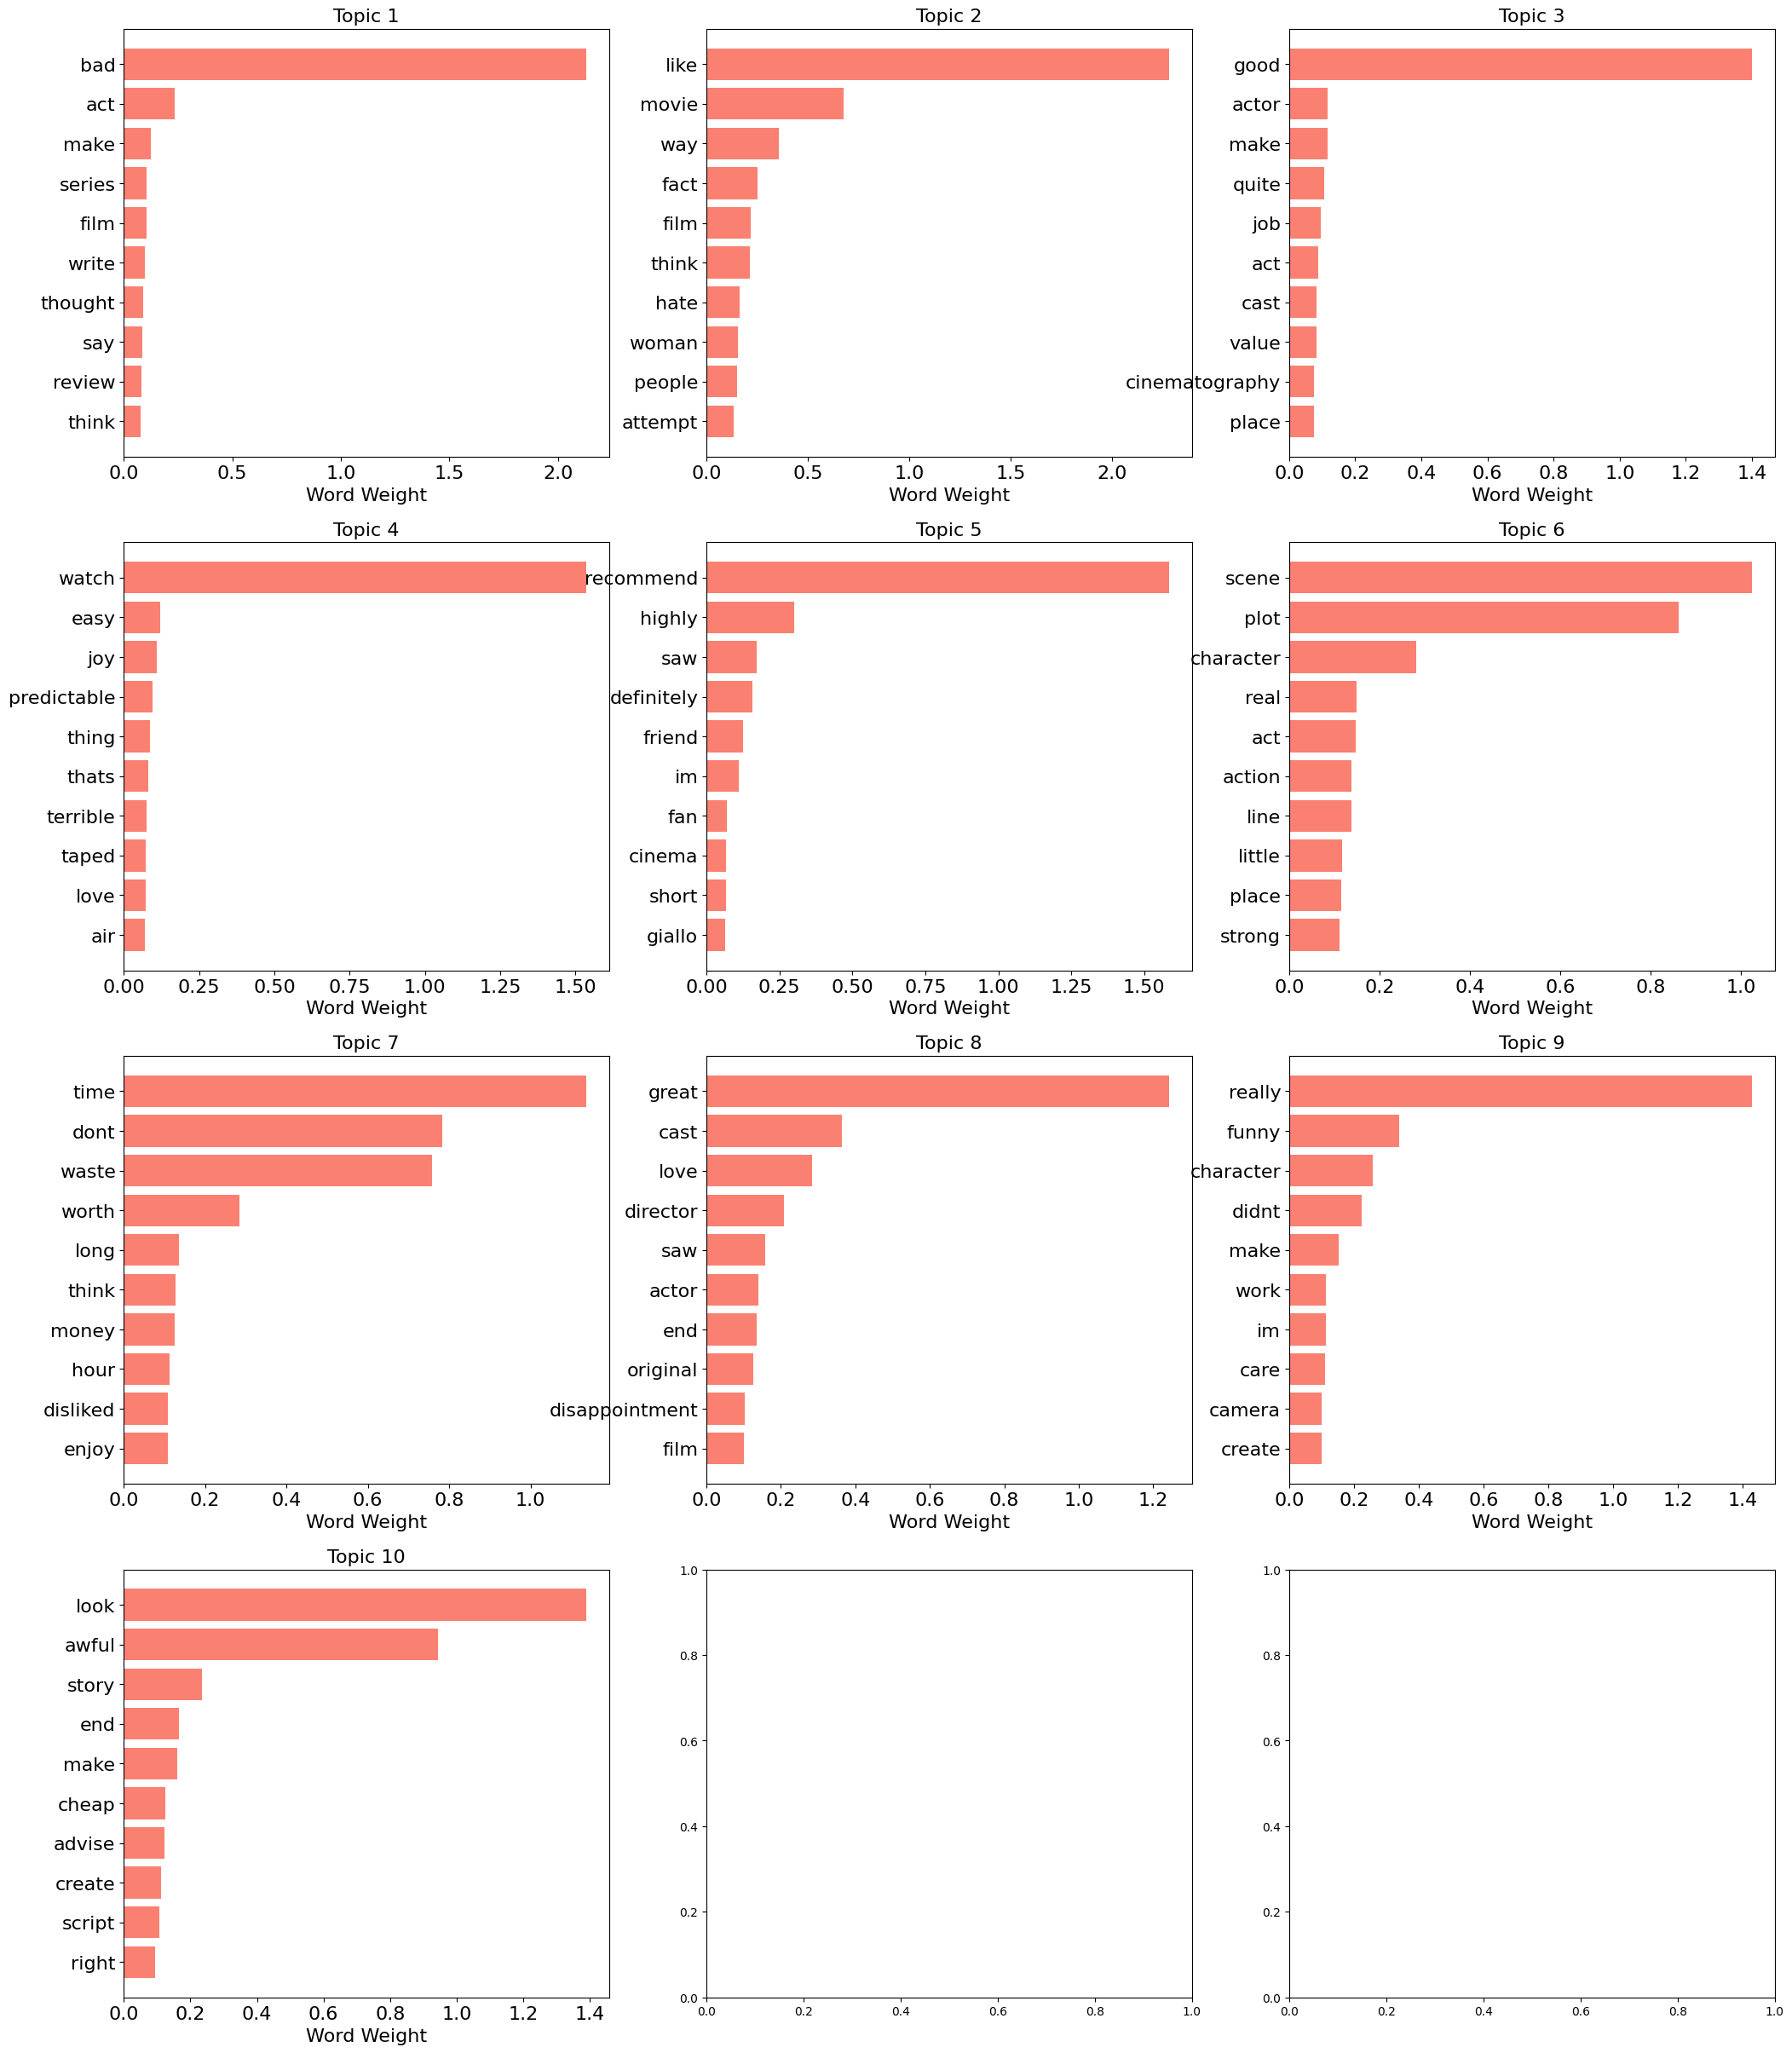

In [78]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 30))
axes = axes.flatten()

for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [terms[i] for i in topic.argsort()[:-n_words - 1:-1]]
    top_weights = topic[topic.argsort()[:-n_words - 1:-1]]

    ax = axes[topic_idx]
    ax.barh(top_words, top_weights, color="salmon")
    ax.invert_yaxis()
    ax.set_xlabel("Word Weight", fontsize=16)
    ax.set_title(f"Topic {topic_idx + 1}", fontsize=16)
    ax.tick_params(axis='x',labelsize=16)
    ax.tick_params(axis='y',labelsize=16)

In [79]:
texts = [doc.split() for doc in reviews.Text]
tfidf_vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(), lowercase=False)
tfidf = tfidf_vectorizer.fit_transform(reviews.Text)

nmf_model = NMF(n_components=3, random_state=42)
nmf_model.fit(tfidf)

feature_names = tfidf_vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(nmf_model.components_):
    top_words = [feature_names[i] for i in topic.argsort()[:-11:-1]]
    topics.append(top_words)

dictionary = Dictionary(texts)
coherence_model_nmf = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v'
)
coherence_score_nmf = coherence_model_nmf.get_coherence()
print("NMF Coherence Score:", coherence_score_nmf)

NMF Coherence Score: 0.5527532944576147
